In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [3]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473096


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473096


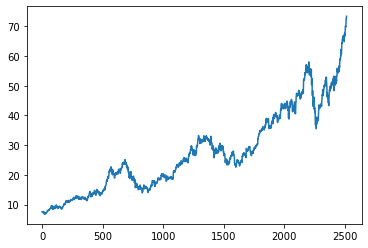

In [5]:
plt.plot(df.Close)

In [6]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
2515    54.793137
Name: Close, Length: 2516, dtype: float64

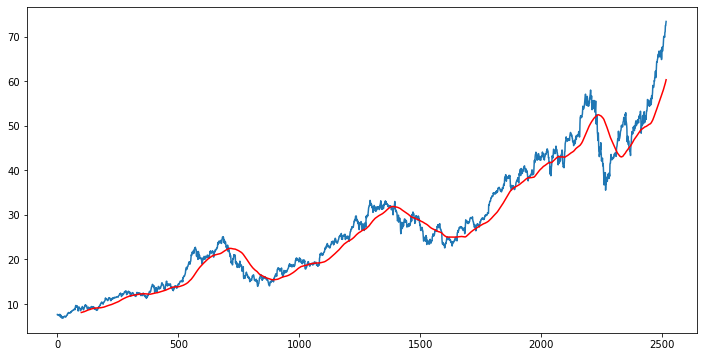

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

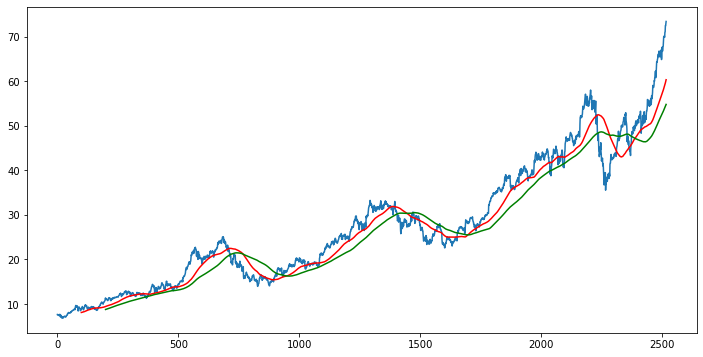

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [9]:
# Splitting Data into Training and Testing 

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [10]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [11]:
# Start of training and testing

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(1761, 1)

In [14]:
x_train = []
y_train = []

# Time series concept: the ma100 is the avg of previous 100 days
# Splitting training into x_train and y_train
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train.shape

(1661, 100, 1)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [18]:
# LSTM model Just like Recurrent Neural Networks, an LSTM network also generates an output 
# at each time step and this output is used to train the network using gradient descent.
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [20]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 15s 183ms/step - loss: 0.0700
Epoch 2/50
52/52 [==============================] - 11s 203ms/step - loss: 0.0124
Epoch 3/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0118
Epoch 4/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0097
Epoch 5/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0095
Epoch 6/50
52/52 [==============================] - 14s 263ms/step - loss: 0.0091
Epoch 7/50
52/52 [==============================] - 11s 216ms/step - loss: 0.0086
Epoch 8/50
52/52 [==============================] - 10s 199ms/step - loss: 0.0081
Epoch 9/50
52/52 [==============================] - 10s 196ms/step - loss: 0.0091
Epoch 10/50
52/52 [==============================] - 10s 198ms/step - loss: 0.0082
Epoch 11/50
52/52 [==============================] - 11s 205ms/step - loss: 0.0081
Epoch 12/50
52/52 [==============================] - 11s 220ms/step - loss: 0.0075
Epoch 13/50
52/5

In [21]:
model.save('keras_model.h5')

In [22]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [23]:
past_100_days = data_training.tail(100)

In [24]:
final_df = past_100_days.append(data_testing, ignore_index=True)
final_df.head()

,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001


In [25]:
# Need to scale down 
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.07269581],
       [0.076

In [26]:
input_data.shape

(855, 1)

In [27]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [28]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [29]:
#Making Predictions

y_predicted = model.predict(x_test)
print(y_predicted.shape)
y_predicted


24/24 [==============================] - 2s 60ms/step
(755, 1)


array([[0.1744687 ],
       [0.17577778],
       [0.17703068],
       [0.17820469],
       [0.17928521],
       [0.18027255],
       [0.1811778 ],
       [0.18202707],
       [0.18285584],
       [0.18368745],
       [0.1845308 ],
       [0.1853968 ],
       [0.1862926 ],
       [0.18721816],
       [0.18816864],
       [0.18913636],
       [0.19011042],
       [0.19108877],
       [0.19207504],
       [0.19307286],
       [0.19408217],
       [0.19509754],
       [0.19614294],
       [0.19725613],
       [0.19848359],
       [0.19986753],
       [0.20144403],
       [0.20323737],
       [0.20525719],
       [0.20749533],
       [0.2099331 ],
       [0.21255006],
       [0.21532346],
       [0.21822429],
       [0.22120257],
       [0.2242198 ],
       [0.2272429 ],
       [0.23023719],
       [0.23316646],
       [0.23598723],
       [0.23868363],
       [0.24126126],
       [0.2437263 ],
       [0.24608916],
       [0.24835569],
       [0.2505282 ],
       [0.2526016 ],
       [0.254

In [30]:
# Scale down again
scaler.scale_

array([0.02099517])

In [31]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

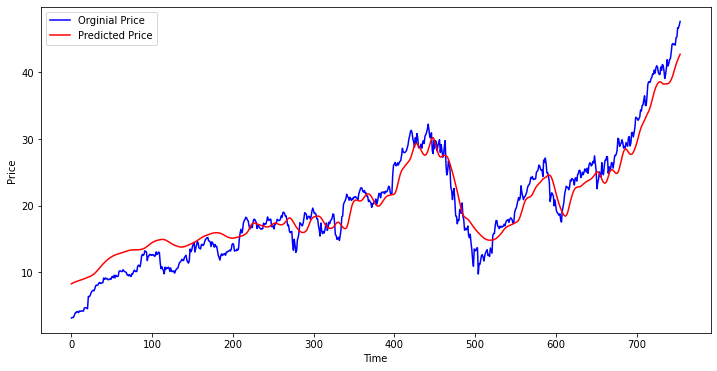

In [32]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Orginial Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()